### Data Science Day 12: Odds Ration

#### Learning Objectives
##### 1. Probability vs Odds Vs Odds Ratio

1. Probability = Event/Sample Space
2. Odds= Prob(Event)/Prob(Non-Event)
3. Odds Ratio = Odds(Group 1)/ Odds(Group 2)

##### 2. Interpretation
The Odds Ratio is a measure of association between exposure and outcome.

OR=Odds(Group 1)/Odds(Group2)>1 indicates the increased occurrence of an event in Group 1 compared to Group 2.

OR=Odds(Group 1)/Odds(Group2) < 1 indicates the decreased occurrence of an event in Group 1 compared to Group 2.

The true Odds Ratio lies in between 95% Confidence interval and P-value represents the statistical significant

##### 3. Example: UCLA Graduate School Admission dataset
1.  calculate both theoretical and true Odds Ratio and interpret the meaning of odds ratio

In [67]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import UCLA dataset  
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df.columns=["admit", "gre", "gpa", "prestige"]
print (df.head())

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


In [68]:
#descriptive statistics
print (df.describe())

            admit         gre         gpa   prestige
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


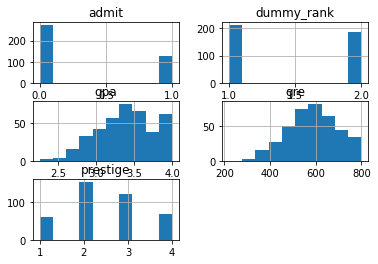

   admit  gre   gpa  prestige  dummy_rank
0      0  380  3.61         3           2
1      1  660  3.67         3           2
2      1  800  4.00         1           1
3      1  640  3.19         4           2
4      0  520  2.93         4           2
dummy_rank    1    2
admit               
0           125  148
1            87   40


In [69]:
#1 is the most prestiges school. 
# we make a dummy_rank to group prestige 1,2 as 1 and 3,4 as 2
df["dummy_rank"]=np.where(df["prestige"] <3 , 1 ,2)   
df.hist()
pl.show()
#dummy_rank=pd.get_dummies(df["prestige"],prefix="prestige")
print (df.head())

#frequncy table prestiges vs admit
print(pd.crosstab(df['admit'],df["dummy_rank"]))

In [70]:
#Apply logistic regression
X=df[["gre","gpa","dummy_rank"]]

logit=sm.Logit(df["admit"],X)
result=logit.fit()
print (result.summary())
print (result.conf_int())

Optimization terminated successfully.
         Current function value: 0.593637
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Oct 2018   Pseudo R-squ.:                 0.05014
Time:                        17:44:14   Log-Likelihood:                -237.45
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 3.604e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0014      0.001      1.318      0.188      -0.001       0.003
gpa            0.0247      0.

In [71]:
# Theoratical odds ratio
print(np.exp(result.params))

params= result.params
conf=result.conf_int()
conf["OR"]=params
conf.columns=["2.5%","97.5%","OR"]
print(np.exp(conf))

gre           1.001355
gpa           1.024980
dummy_rank    0.319973
dtype: float64
               2.5%     97.5%        OR
gre         0.99934  1.003374  1.001355
gpa         0.68702  1.529189  1.024980
dummy_rank  0.20728  0.493933  0.319973


In [72]:
# Calculate Probality vs Odds vs Odds ratio

prob_rank1_accept=87/(125+87)
print(prob_rank1_accept)

prob_rank2_accept=40/(148+40)
print(prob_rank2_accept)

odds_rank1=87/125
odds_rank2=40/148
print(odds_rank1, odds_rank2)

odds_ratio=odds_rank2/odds_rank1
print(odds_ratio)

0.41037735849056606
0.2127659574468085
0.696 0.2702702702702703
0.38831935383659527


Text(0,0.5,'Student Frequency Count')

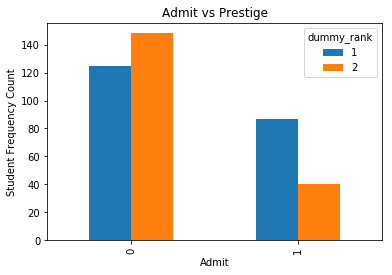

In [73]:
#Visulatization

%matplotlib inline
pd.crosstab(df.admit, df.dummy_rank).plot(kind="bar")
plt.title("Admit vs Prestige")
plt.xlabel("Admit")
plt.ylabel("Student Frequency Count")

#### Summary

Our theoretical Odds Ratio is 0.319 with a CI(0.20, 0.41), which is close to the true Odds ratio, 0.388. This indicates if the undergraduate students are from the school in prestige 3 or 4, the chances of them getting in graduate school is 38% that of the students from prestige 1 or 2 undergraduate schools. In other words, it is 2.5 times more likely for a student to get into a graduate school from undergraduate school rated in Prestige 1 or 2 compared to 3 or 4.

